# Algoritmo Genético - Problema do Caixeiro Viajante  
---  
**Aluno: João Victor Campos Costa**  
Definam, e deixem claro no relatório, quais foram os critérios utilizados para se gerar a próxima geração.
Como sugestão e ponto de partida, considerem algo em torno de 20 indivíduos em cada geração. Classifiquem os 
indivíduos pela ordem de aptidão. No presente caso, `quanto menor a distância percorrida, maior será a aptidão`.  

**Sugiro que o indivíduo mais apto sempre seja clonado e que alguns indivíduos da próxima geração sejam mutações dele.**
Além disso, um critério interessante é escolher os pais dos indivíduos da próxima geração com base numa probabilidade
diretamente proporcional à sua aptidão.  

**Sugiro que considerem o número de cidades, 𝑁 ∈ [10,150]**. Mostrem a evolução da menor distância percorrida para um dado número de gerações. Definam critérios de parada (quantas gerações gerar) baseados tanto na modificação da distância percorrida em um conjunto de gerações quanto no total de gerações consideradas.   

Ao final, principalmente para as instâncias com menor número de cidades, vocês devem chegar na solução exata do problema, o que algumas vezes pode ser verificado até mesmo de forma visual.
Apresentem suas impressões e conclusões sobre o método em um relatório que deve analisar
pelo menos três problemas (conjuntos de cidades) de tamanhos diferentes.

Critério de parada -> `Número de gerações ou critério de convergência`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Iremos considerar 𝑁 cidades distribuídas num plano cartesiano bidimensional. As coordenadas de 
cada cidade serão escolhidas aleatoriamente no intervalo [0,1). Assim, sugiro que sejam definido 
os vetores 𝑥 e 𝑦, cada um contendo 𝑁 elementos, com valores no intervalo citado

In [2]:
N = 3
x = np.random.rand(N)
y = np.random.rand(N)


In [3]:
print(f"Coordenadas x: {x} | Coordenadas y: {y}")

Coordenadas x: [0.98686146 0.41242592 0.1181491 ] | Coordenadas y: [0.49223071 0.71817507 0.10463996]


In [4]:
def plot_cidades(x,y, print_coord: bool = False):
    for xi, yi in list(zip(x,y)):
        plt.scatter(xi, yi)
        if print_coord:
            print(xi, yi);

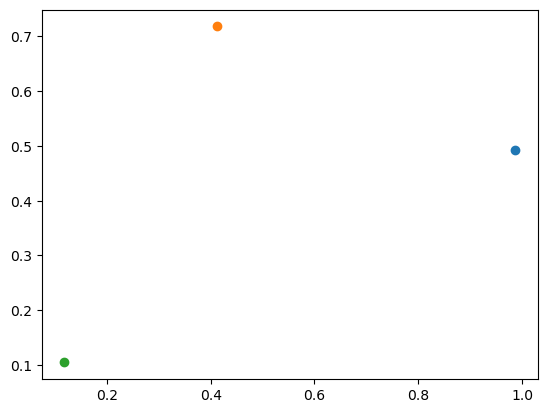

In [5]:
plot_cidades(x,y)

O caminho a ser percorrido será, então, uma sequência de tamanho 𝑁 e também será representado por um vetor de
tamanho 𝑁 que chamarei de 𝑐𝑎𝑚. A sequência mais simples de se definir seria 0, 1, 2, . . . , 𝑁 − 1 (já considerando índices dos vetores iniciando em 0), onde o caixeiro percorreria as cidades na ordem
definida pela lista inicial e, após chegar à última cidade (𝑁 − 1) o caixeiro retornaria para primeira cidade (0).

In [6]:
for k in range(1, 3):
    print(k)

1
2


In [7]:
cam = np.arange(N, dtype=np.int16)
cam.tolist()

[0, 1, 2]

Usando o pacote numpy, há a opção de embaralhar esses valores para gerar um novo
caminho aleatório através do comando np.random.shuffle()

In [8]:
num_individuos = 3
# inicia a lista de caminhos dos individuos com o caminho base [0,1,2...,N-1]

# desnecessário
ncam = [cam.tolist()]

for n in range(1, num_individuos):
    vec_temp = cam.copy()
    random.shuffle(vec_temp)
    ncam.append(vec_temp)

print(f"População [genótipo] -> Caminhos = {ncam}")

População [genótipo] -> Caminhos = [[0, 1, 2], array([1, 0, 2], dtype=int16), array([1, 0, 2], dtype=int16)]


O vetor `cam` será o `genótipo` do nosso indivíduo. A partir do genótipo, determinamos a aptidao (distância que cada um percorre) de cada individuo

Para facilitar os cálculos, sugiro que seja construído um array (tabela) 𝑁 × 𝑁, que chamarei de 𝑑𝑖𝑠𝑡, que contenha a distância entre cada par de cidades.

In [9]:
dist = np.empty((N, N))
for i in range(N):
    for j in range(N):
        dist[i][j] = np.sqrt( (x[i] - x[j])**2 + (y[i] - y[j])**2 )

print(dist)


[[0.         0.61727389 0.95125588]
 [0.61727389 0.         0.6804588 ]
 [0.95125588 0.6804588  0.        ]]


De posse dessa  tabela, a distância percorrida pelo indivíduo k (apt[k]), caracterizado pelo genótipo cam[k], que é um vetor, será calculada por:



No loop de percorrer cidade, faz-se na numeração do Python N-1 operações. Por exemplo o caminho o [0, 1, 2] para N = 3 cidades:

i = 0 -> dist(0, 1)  
i = 1 -> dist(1, 2)

In [10]:
# Com apenas um indivíduo e distancia percorrida usual [0, 1, 2]
aptidao = np.empty(num_individuos)
# Preencher aptidao, i.e, calcular a distância percorrida por cada um, loop em N-1:

# para todos os genotipos
for k in range(num_individuos):
    
    # Percorrer as cidades (N-1 operações)
    for i in range(N-1):
        aptidao[k] = aptidao[k] + dist[ncam[k][i], ncam[k][i+1]]
    
    # retornar a cidade inicial
    aptidao[k] += dist[ncam[k][0], ncam[k][N-1]] 


In [11]:
aptidao

array([2.24898857, 2.24898857, 2.24898857])